<h3>📊 Exploratory Data Analysis (EDA) Summary</h3>

<h4>1. Dataset Overview</h4>

The dataset contains information about policyholders such as:

Demographics (Customer_Age, Gender)

Policy-related info (Policy_Type, Premium_Amount, Claim_Amount)

Labels: Fraudulent_Claim, Claim_Amount, Risk_Score.

<h4>2. EDA Focus</h4>

The EDA notebook focused on visualizations, distribution analysis, and relationship insights.

No preprocessing (handling of missing values, encoding, outlier removal, or scaling) was done in this notebook.

<h4>3. Preprocessing Delegation</h4>

All data cleaning and transformation steps are handled in the preprocessing.py script.

Missing value imputation

Outlier treatment (IQR)

One-hot encoding for Gender and Policy_Type

Label encoding for Risk_Score

Standard scaling of numerical features

<h4>4. Insights from Visuals</h4>

Distributions showed skewness in Annual_Income and Claim_Amount.

Pairplots and heatmaps indicated mild to moderate correlations between Claim_Amount, Premium_Amount, and Annual_Income.

Categorical variables like Policy_Type and Gender had varying patterns across fraud and risk levels.

<h3>Import Required libraries</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

<h3>Read The Dataset</h3>

In [2]:
df = pd.read_csv("D:\AI-Powered Intelligent Insurance Risk Assessment and Customer Insights System\Dataset\Insurance_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\sures\AppData\Local\Temp\ipykernel_19096\3036436705.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("D:\AI-Powered Intelligent Insurance Risk Assessment and Customer Insights System\Dataset\Insurance_data.csv")


In [3]:
df.head()

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
0,PLCY100000,43,Female,Auto,20555.17,1.2,0,0,378.96,201.18,Low
1,PLCY100001,47,Male,Health,24859.15,4.0,0,0,504.34,473.18,Medium
2,PLCY100002,38,Female,Health,10803.51,6.5,0,0,269.97,412.07,Low
3,PLCY100003,34,Male,Property,33232.13,2.6,0,0,238.96,467.02,Low
4,PLCY100004,46,Male,Health,23997.00,0.3,0,0,276.97,255.20,Low


In [4]:
df.shape

(10000, 11)

<h3>Dataset Information<h3>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Policy_ID                10000 non-null  object 
 1   Customer_Age             10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Policy_Type              10000 non-null  object 
 4   Annual_Income            9538 non-null   float64
 5   Vehicle_or_Property_Age  9015 non-null   float64
 6   Claim_History            10000 non-null  int64  
 7   Fraudulent_Claim         10000 non-null  int64  
 8   Premium_Amount           9472 non-null   float64
 9   Claim_Amount             10000 non-null  float64
 10  Risk_Score               10000 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 859.5+ KB


<h3>Summary Statistics for Numerical data</h3>

In [6]:
df.describe()

,Customer_Age,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount
count,10000.000000,9538.000000,9015.000000,10000.000000,10000.000000,9472.000000,10000.000000
mean,37.820400,24820.111058,6.833023,0.866100,0.074200,461.986739,659.728806
std,11.469677,13106.995177,6.473269,1.575633,0.262109,230.793576,547.778652
min,18.000000,3542.040000,0.000000,0.000000,0.000000,141.010000,88.420000
25%,30.000000,15714.640000,2.000000,0.000000,0.000000,290.597500,331.637500
50%,37.000000,21921.825000,4.900000,0.000000,0.000000,351.030000,495.635000
75%,46.000000,30605.140000,9.700000,1.000000,0.000000,601.195000,813.377500
max,90.000000,149475.990000,30.000000,10.000000,1.000000,1164.220000,5350.790000


<h3>Summary Statistics for Categorical data</h3>

In [7]:
df.describe(include='object')

,Policy_ID,Gender,Policy_Type,Risk_Score
count,10000,10000,10000,10000
unique,10000,3,4,3
top,PLCY100000,Male,Health,Low
freq,1,5474,4018,5971



<h3>Exploratory Data Analysis</h3>

<h4>Univariate Analysis</h4>


In [8]:
df.head(5)

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
0,PLCY100000,43,Female,Auto,20555.17,1.2,0,0,378.96,201.18,Low
1,PLCY100001,47,Male,Health,24859.15,4.0,0,0,504.34,473.18,Medium
2,PLCY100002,38,Female,Health,10803.51,6.5,0,0,269.97,412.07,Low
3,PLCY100003,34,Male,Property,33232.13,2.6,0,0,238.96,467.02,Low
4,PLCY100004,46,Male,Health,23997.00,0.3,0,0,276.97,255.20,Low


Text(0.5, 1.0, 'Distribution of Risk level')

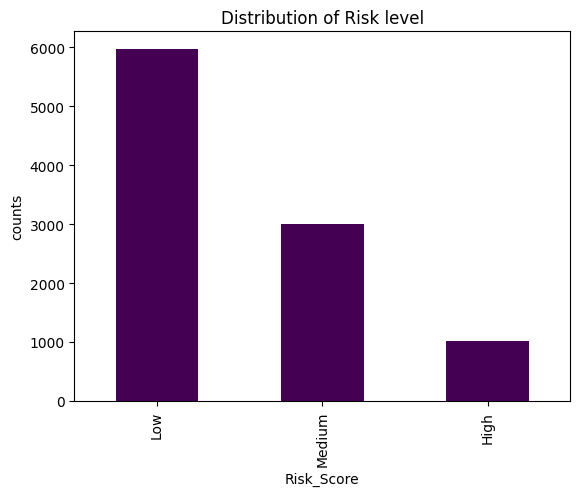

In [9]:
#target columns
df["Risk_Score"].value_counts().plot(kind='bar',colormap='viridis')
plt.ylabel("counts")
plt.title("Distribution of Risk level")

This bar plot clearly shows the distribution of risk levels among policyholders:

🔵 Low risk: Majority (~60%)

🟠 Medium risk: Moderate (~30%)

🔴 High risk: Minority (~10%)

Text(0.5, 1.0, 'Distribution of Fradulent level')

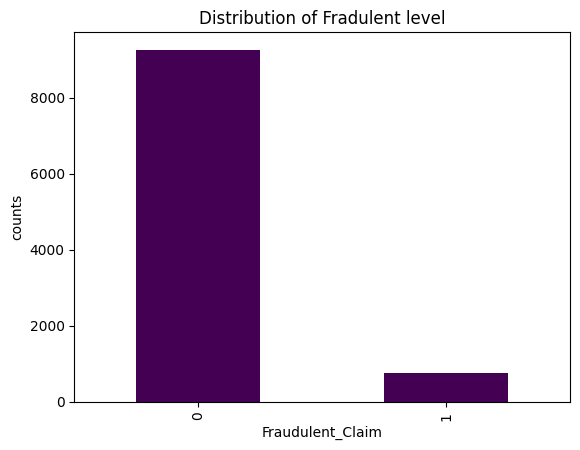

In [10]:
#Fradulent claim
df["Fraudulent_Claim"].value_counts().plot(kind='bar',colormap='viridis')
plt.ylabel("counts")
plt.title("Distribution of Fradulent level")

This bar plot clearly shows the distribution of Fradulent levels among policyholders:

🔵 Geniune Claims: Majority (~90%)

🟠 Fradulent Risk: Minority (~10%)

Text(0.5, 1.0, 'Distribution Of Policy Holders')

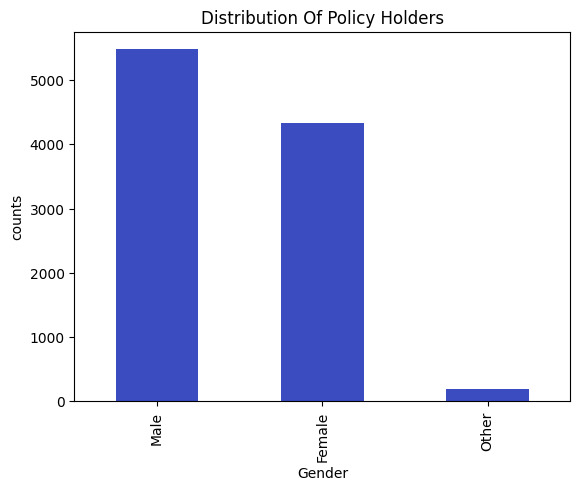

In [11]:
#Gender counts
df["Gender"].value_counts().plot(kind='bar',colormap='coolwarm')
plt.ylabel("counts")
plt.title("Distribution Of Policy Holders")

This bar plot clearly shows the distribution of Genders among policyholders:

🔵 Male: Majority (~55%)

🟠 Medium risk: Moderate (~45%)

🔴 High risk: Minority (~10%)

Text(0.5, 1.0, 'Customer Age Distribution ')

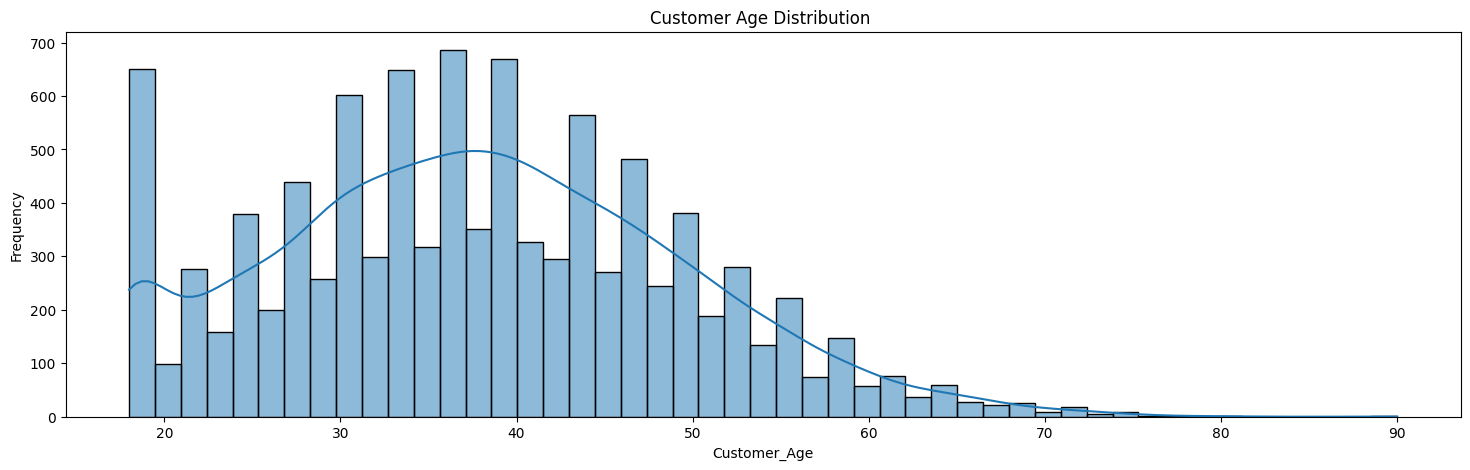

In [12]:
#Age Distibution Among policy Holders 
plt.figure(figsize=(18,5))
sns.histplot(df["Customer_Age"],kde=True)
plt.xlabel('Customer_Age')
plt.ylabel("Frequency")
plt.title("Customer Age Distribution ")

🔍 Insights from the Customer Age Distribution:

Most policyholders are in their 30s to early 40s, peaking around age 38–40.

There’s a notable drop after age 50, with few policyholders over 60.

A secondary spike appears around age 18–19, likely representing first-time policyholders (e.g., auto insurance).

The overall distribution is right-skewed, meaning younger customers dominate the dataset.

C:\Users\sures\AppData\Local\Temp\ipykernel_19096\1600619125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Policy_Type"],palette='coolwarm')


<Axes: xlabel='count', ylabel='Policy_Type'>

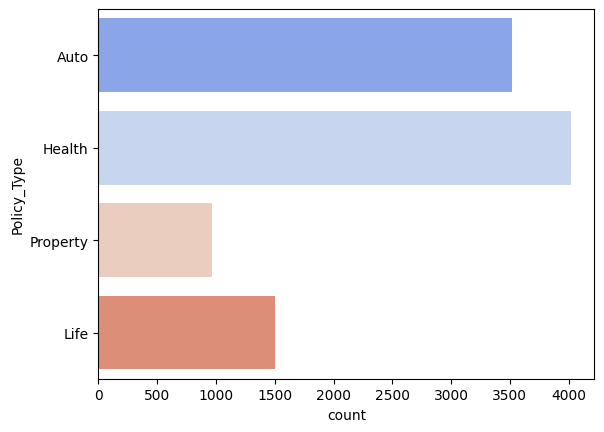

In [13]:
#policy types
sns.countplot(df["Policy_Type"],palette='coolwarm')

In this plot,We can clearly understand that Health and Auto Insurance policy are in High Amount than Life and Property insurance policy.

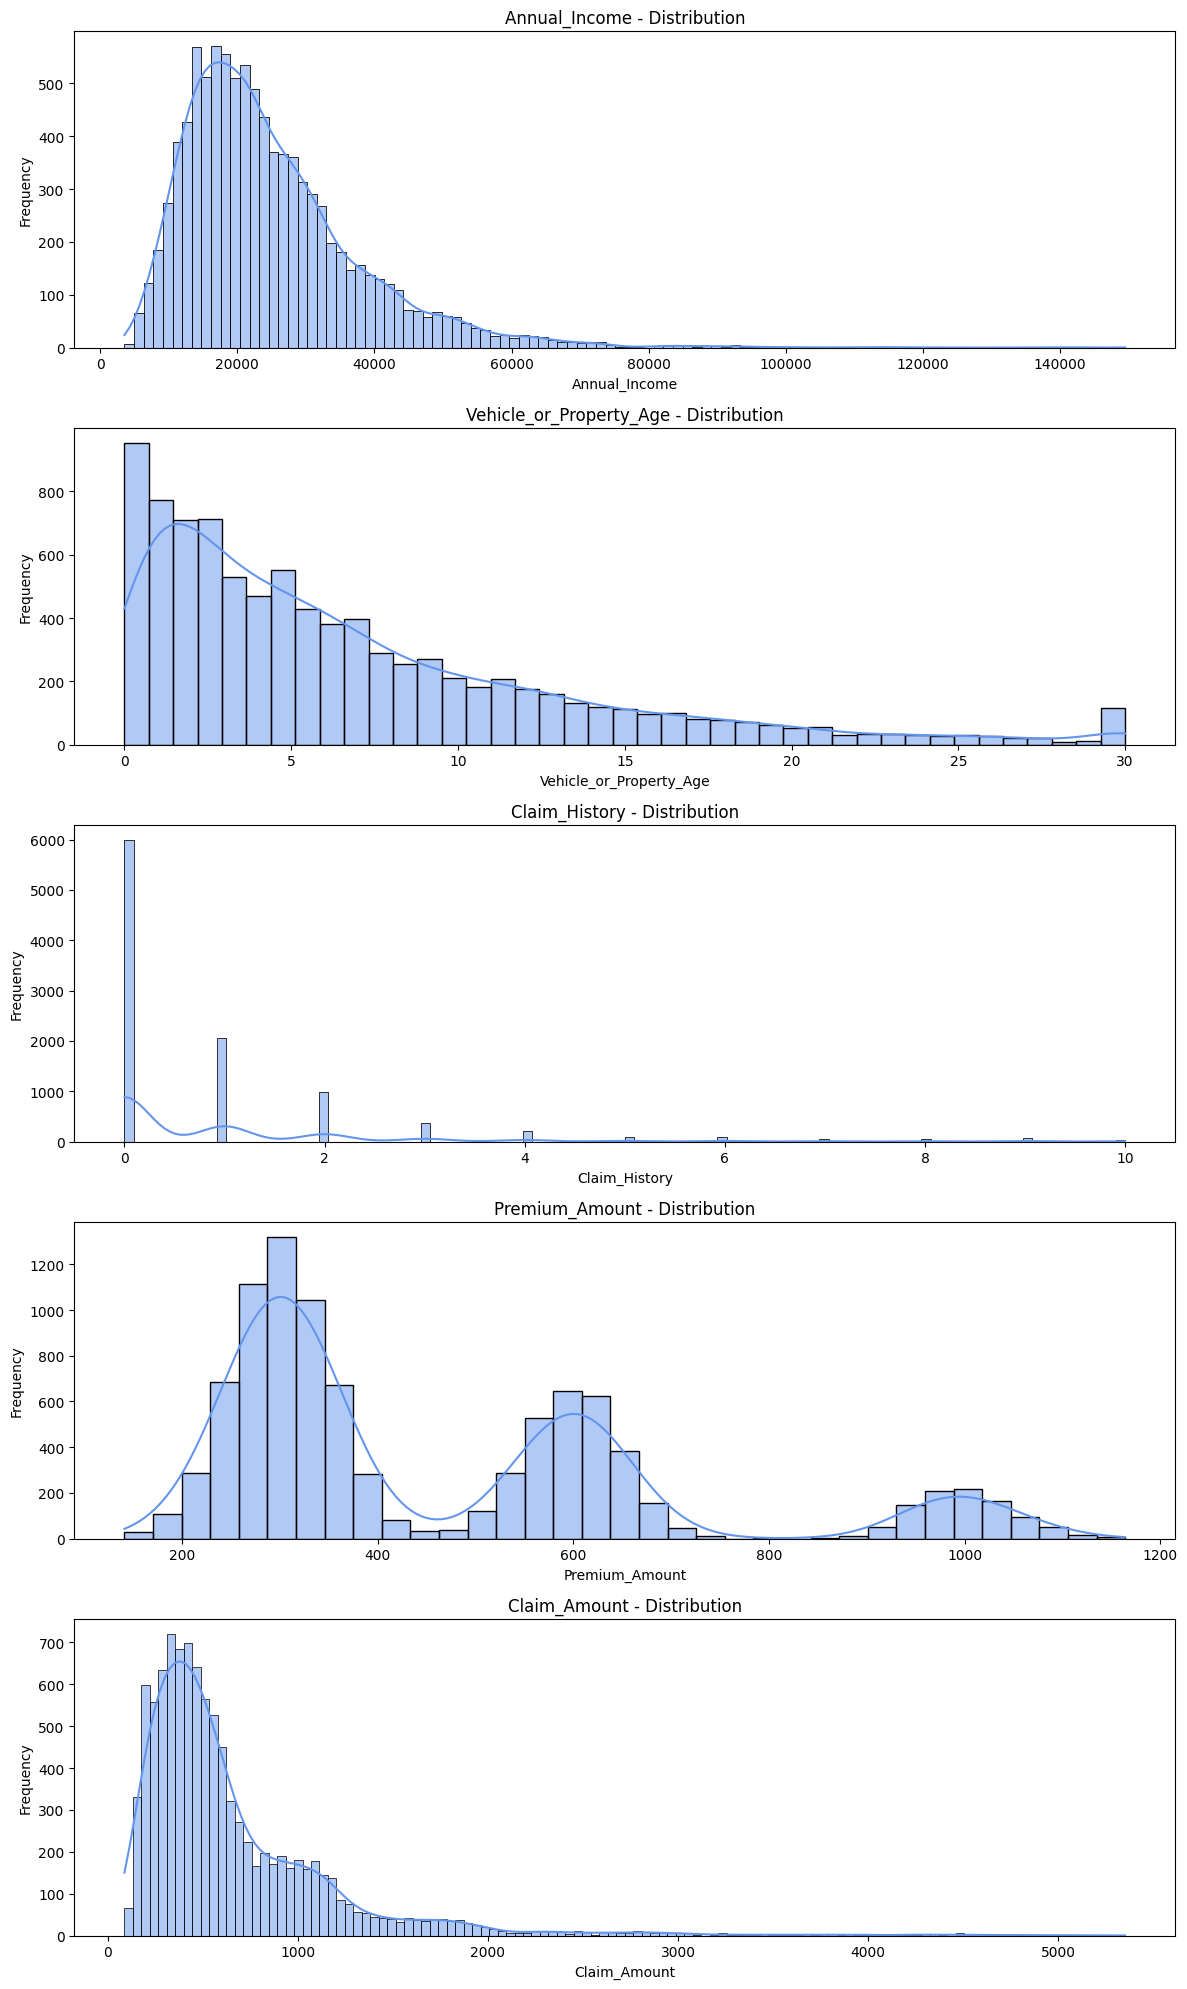

In [14]:
## List of numerical columns
num_cols = [
    "Annual_Income",
    "Vehicle_or_Property_Age",
    "Claim_History",
    "Premium_Amount",
    "Claim_Amount"
]

# Plotting
plt.figure(figsize=(12, 4 * len(num_cols)))

for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, i + 1)
    sns.histplot(df[col], kde=True, color='cornflowerblue', edgecolor='black')
    plt.title(f"{col} - Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

📊 Distribution Insights

1. Most customers earn between $10,000–$30,000. Very few earn above $60,000.

2. Most vehicles/properties are less than 5 years old. A very small number are very old (close to 30 years).

3. Majority have 0 past claims. Few people have made more than 1 or 2.

4. Two main clusters — one around $300 and another around $600–$700. There’s a third small bump at $1000+.

5. Most claims are under $1,000, but some outliers go above $5000.



<h3> 1. Bivariate Analysis with Risk_Score (Categorical)</h3>

<h4>📈 Categorical Features vs Risk_Score </h4>

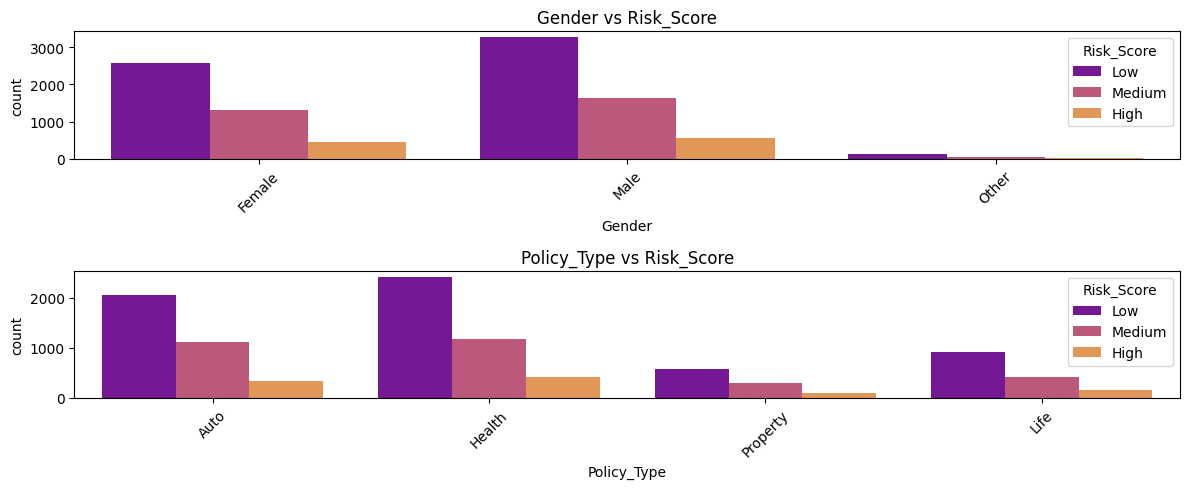

In [15]:
cat_cols = ['Gender', 'Policy_Type']

plt.figure(figsize=(12, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols),1, i + 1)
    sns.countplot(data=df, x=col, hue='Risk_Score', palette='plasma')
    plt.title(f'{col} vs Risk_Score')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>📈 Numerical Features by Risk_Score</h4>

C:\Users\sures\AppData\Local\Temp\ipykernel_19096\245596478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Risk_Score', y=col, palette='cool')
C:\Users\sures\AppData\Local\Temp\ipykernel_19096\245596478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Risk_Score', y=col, palette='cool')
C:\Users\sures\AppData\Local\Temp\ipykernel_19096\245596478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Risk_Score', y=col, palette='cool')
C:\Users\sures\AppData\Local\Temp\ipykernel_19096\24559647

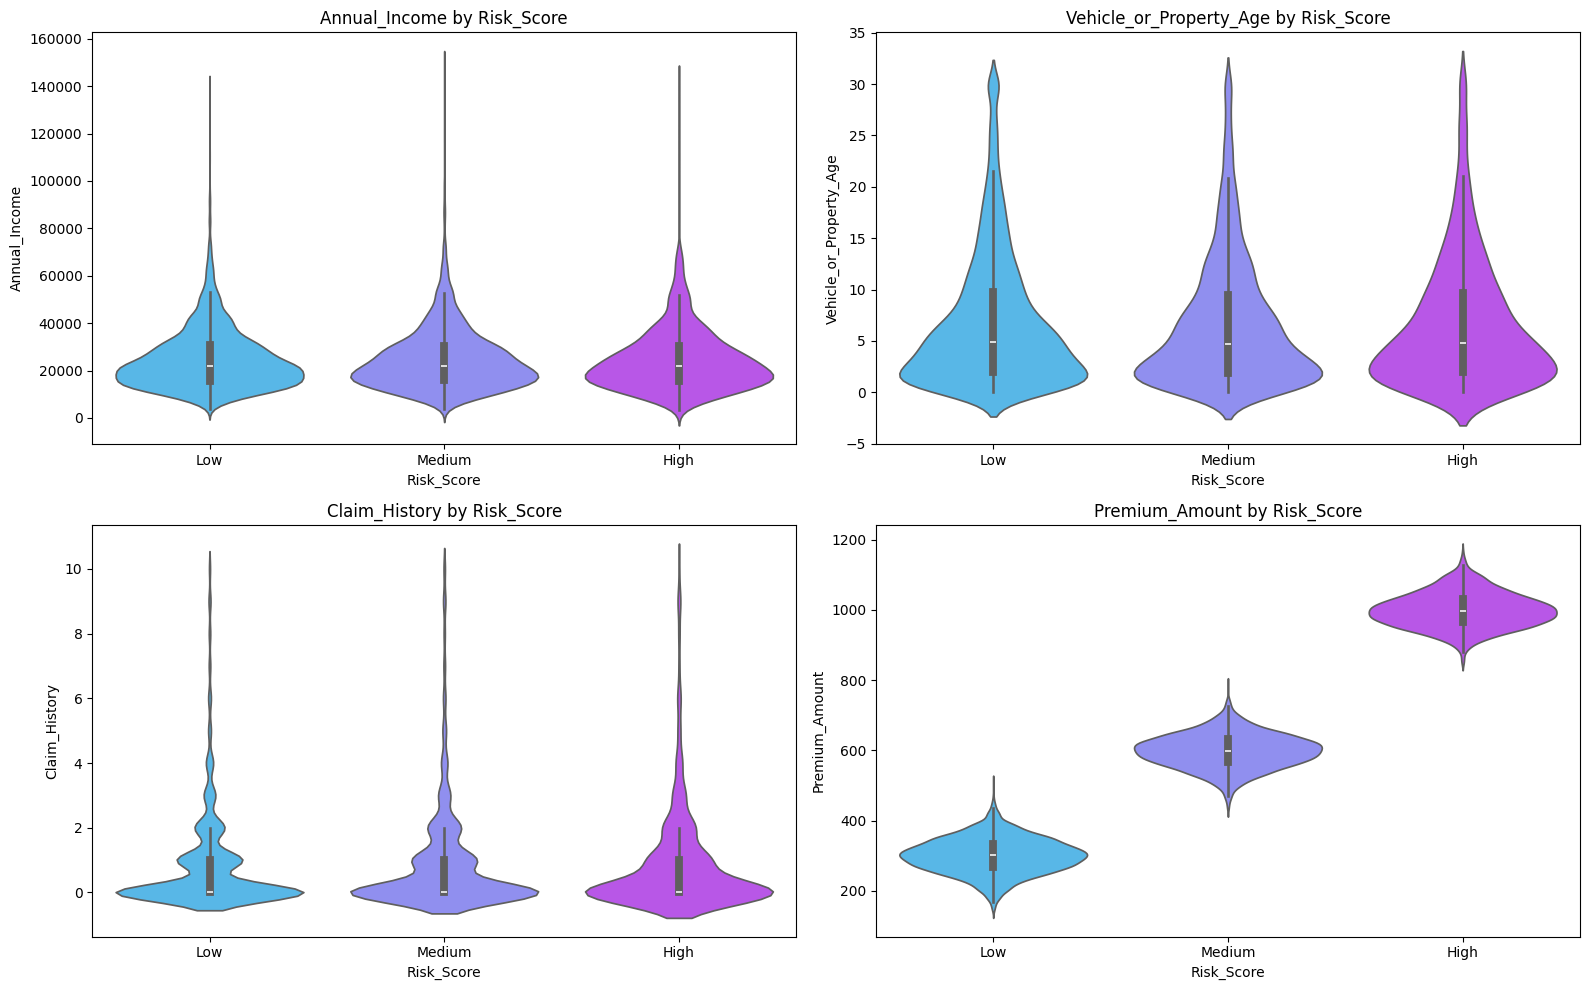

In [16]:
num_cols = ['Annual_Income', 'Vehicle_or_Property_Age', 'Claim_History', 'Premium_Amount']

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(data=df, x='Risk_Score', y=col, palette='cool')
    plt.title(f'{col} by Risk_Score')
plt.tight_layout()
plt.show()

🎯key insights

Premium_Amount is a strong predictor of Risk_Score.

Claim_History and Vehicle_or_Property_Age show moderate correlation.

Annual_Income may not be a strong standalone predictor of risk.

<h3>📉 2. Bivariate Analysis with Claim_Amount (Numeric Target)</h3>

<h4>1. Claim_Amount vs Policy_Type<h4>

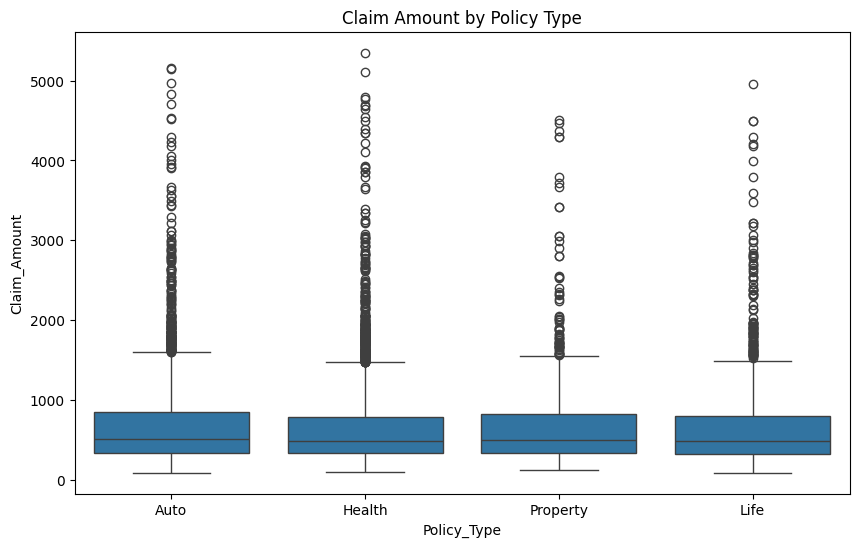

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Policy_Type', y='Claim_Amount', data=df)
plt.title('Claim Amount by Policy Type')
plt.show()

<h4>🔍 Insights</h4>

The median Claim Amount is quite similar across all policy types.

Health policies and Auto policies appear to have a slightly wider spread.

Lots of outliers (especially above ₹2000+), common in insurance data.

Suggests policy type alone may not explain claim amount variance — you'll want to model interactions (like Policy_Type + Risk + Income).

<h4>2. Claim_Amount vs Gender</h4>

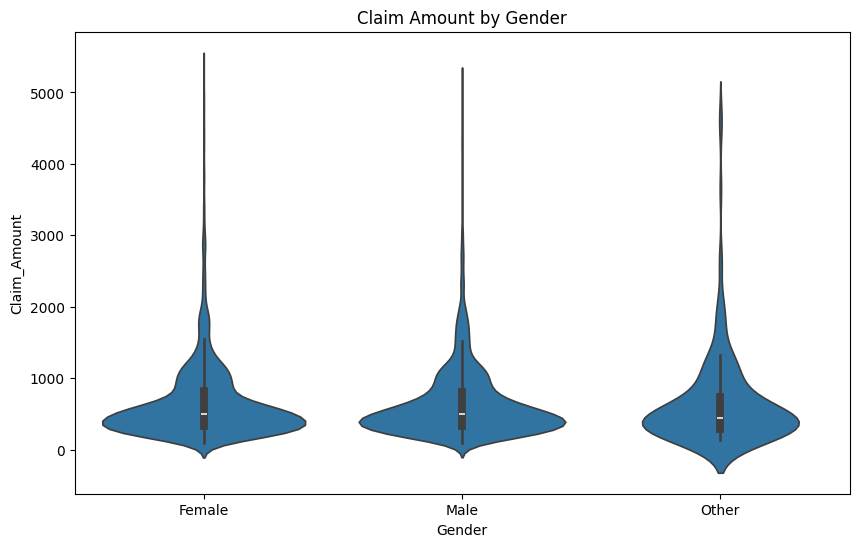

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Claim_Amount', data=df)
plt.title('Claim Amount by Gender')
plt.show()


<h4>🔍 Insights from the Plot</h4>

Distribution shapes for Female, Male, and Other are very similar.

Most claim amounts are concentrated between 200 and 800, regardless of gender.

<h4> 3. Claim_Amount vs Risk_Score</h4>

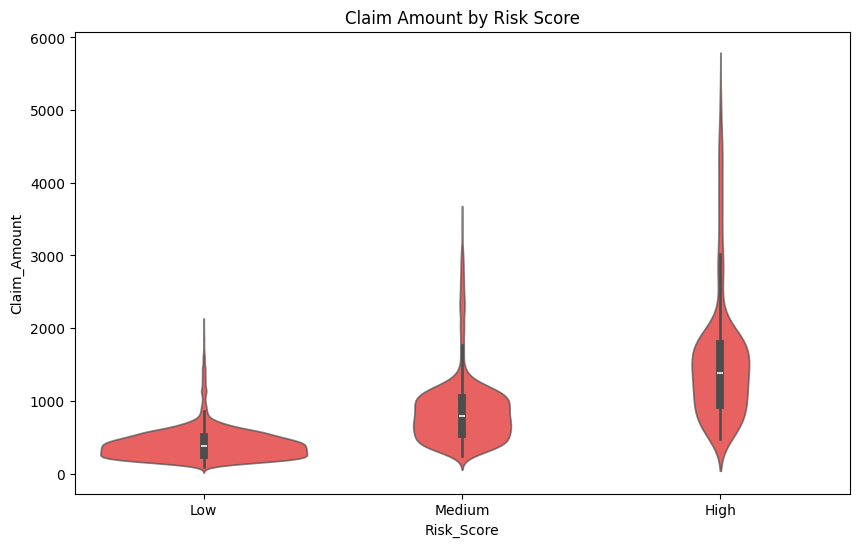

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Risk_Score', y='Claim_Amount', data=df, alpha=0.7,color='red')
plt.title('Claim Amount by Risk Score')
plt.show()

<h4>🔍 Key Insights</h4>

Low risk customers mostly claim < $800.

Medium risk spreads higher, with a central tendency around $800–$1000.

High risk customers not only claim higher amounts but also show a wider range, often above $2000.

<h4>4. Average Claim_Amount per Fraudulent_Claim</h4>

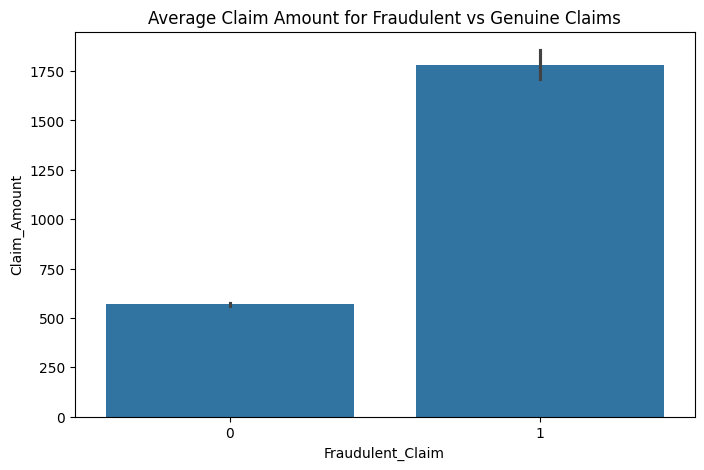

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Fraudulent_Claim', y='Claim_Amount', data=df, estimator='mean')
plt.title('Average Claim Amount for Fraudulent vs Genuine Claims')
plt.show()


<h4>🔍 Key Observation</h4>

Fraudulent claims (1) have an average claim amount of ~$1800.

Genuine claims (0) average around ~$580.

That's more than 3x higher for fraudulent claims.

<h4>5. Annual_Income vs Claim_Amount</h4>

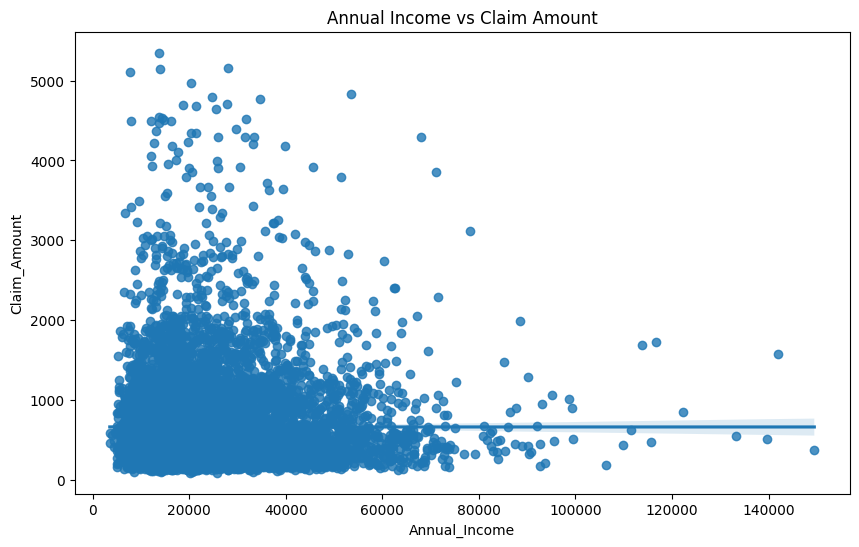

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Annual_Income', y='Claim_Amount', data=df)
plt.title('Annual Income vs Claim Amount')
plt.show()


<h4>📊 Insights</h4>

Mostly clustered at lower income levels (typically < $40,000).But their Claim Amounts are disproportionately high (many above $2000–$5000).
This suggests high claim amounts from lower income groups are more likely to be fraudulent.

<h3>🕵️‍♂️ 3. Bivariate Analysis with Fraudulent_Claim (Binary)</h3>

<h3>Boxplots for numerical variables</h3>

C:\Users\sures\AppData\Local\Temp\ipykernel_19096\2653950822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fraudulent_Claim', y=col, palette='Set1')
C:\Users\sures\AppData\Local\Temp\ipykernel_19096\2653950822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fraudulent_Claim', y=col, palette='Set1')
C:\Users\sures\AppData\Local\Temp\ipykernel_19096\2653950822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fraudulent_Claim', y=col, palette='Set1')
C:\Users\sures\AppData\Local\Temp\ipykernel_19

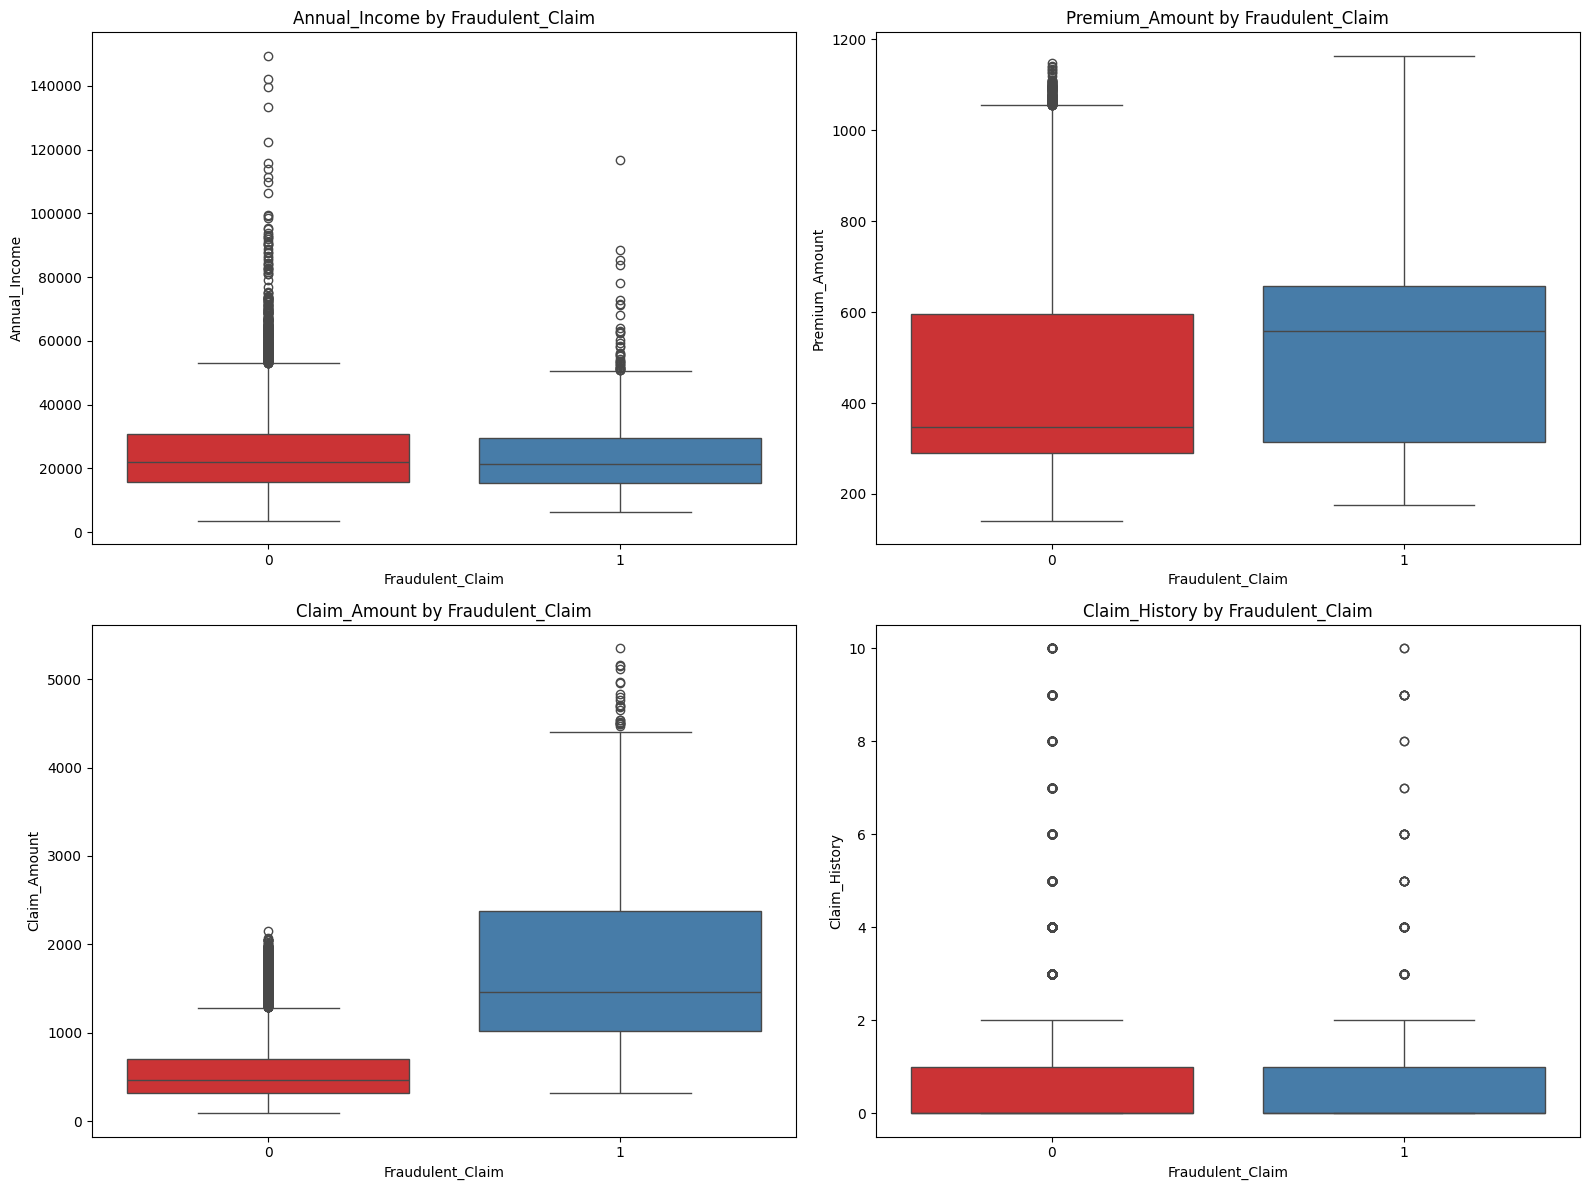

In [22]:
num_cols = ['Annual_Income', 'Premium_Amount', 'Claim_Amount', 'Claim_History']

plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x='Fraudulent_Claim', y=col, palette='Set1')
    plt.title(f'{col} by Fraudulent_Claim')
plt.tight_layout()
plt.show()


✅ Insight: Higher premium plans could be more attractive targets for fraudsters.

🔥 Insight: Claim amount is a strong indicator of fraud.

 <h3>Stacked bar (Categorical vs Fraud)</h3>

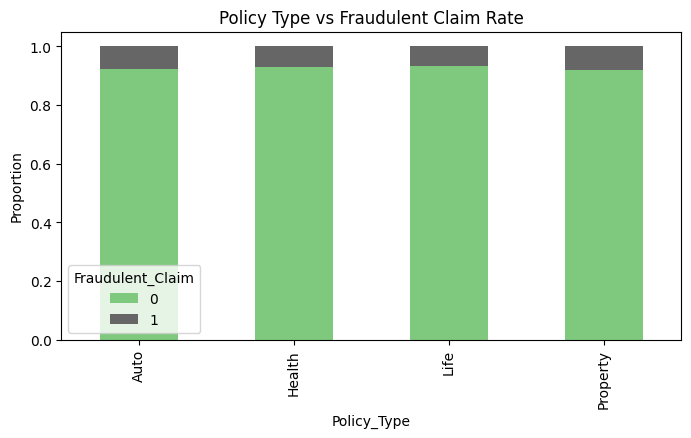

In [23]:
pd.crosstab(df['Policy_Type'], df['Fraudulent_Claim'], normalize='index').plot(
    kind='bar', stacked=True, colormap='Accent', figsize=(8, 4))
plt.title("Policy Type vs Fraudulent Claim Rate")
plt.ylabel("Proportion")
plt.show()

Since the fraudulent proportions are close across categories, this feature might not strongly separate fraud cases on its own.

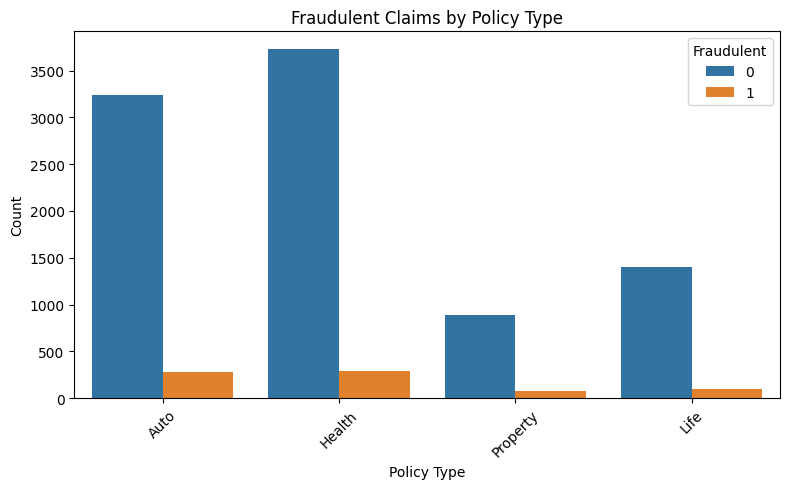

In [24]:

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Policy_Type', hue='Fraudulent_Claim')
plt.title("Fraudulent Claims by Policy Type")
plt.xlabel("Policy Type")
plt.ylabel("Count")
plt.legend(title="Fraudulent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In this plot ,Health and Auto has more fradulent claims than property and life.

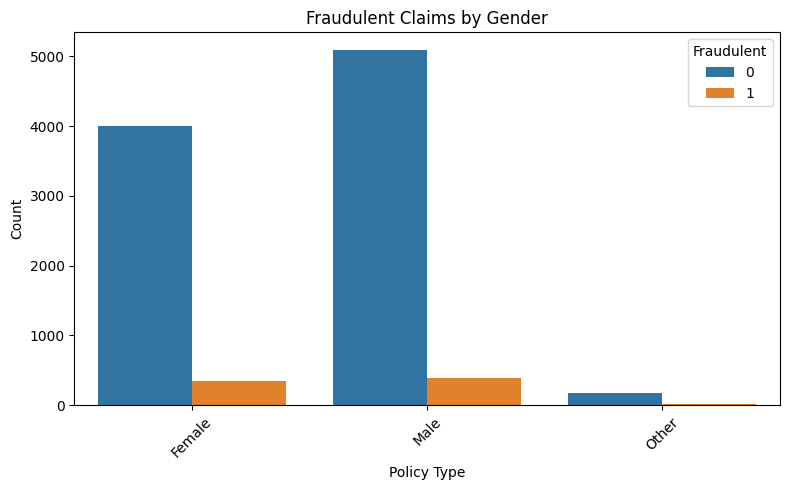

In [25]:

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Gender', hue='Fraudulent_Claim')
plt.title("Fraudulent Claims by Gender")
plt.xlabel("Policy Type")
plt.ylabel("Count")
plt.legend(title="Fraudulent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot shows that male and female has Similar amount of fradulent claims.

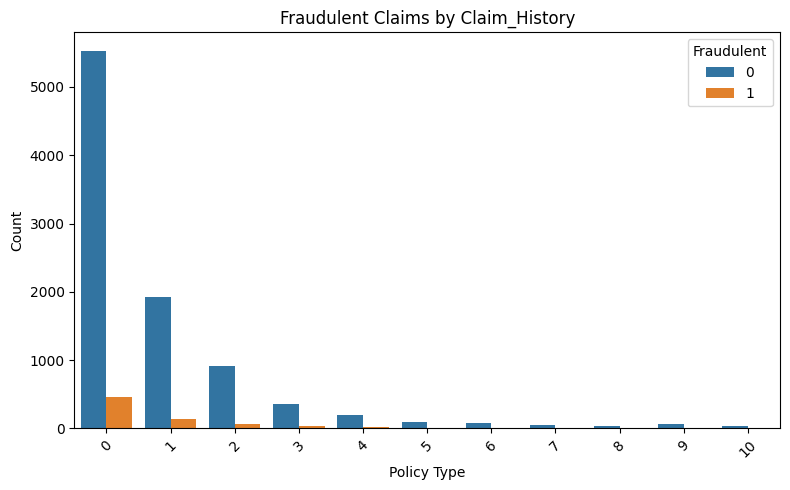

In [26]:

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Claim_History', hue='Fraudulent_Claim')
plt.title("Fraudulent Claims by Claim_History")
plt.xlabel("Policy Type")
plt.ylabel("Count")
plt.legend(title="Fraudulent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>🧩 Observations:</h3>

Claim_History = 0:

This category has the largest number of claims.

Both fraudulent and non-fraudulent claims exist, but non-fraudulent dominate.

Fraud still happens even for first-time claimants, which might suggest opportunistic fraud.

Claim_History = 1 to 3:

As claim history increases slightly, fraud count remains low but visible.

Could indicate a watchlist zone for people making multiple small claims.

Claim_History > 3:

Very few data points, almost all genuine claims.

This may be due to insurers avoiding repeated claims or filtered customers.

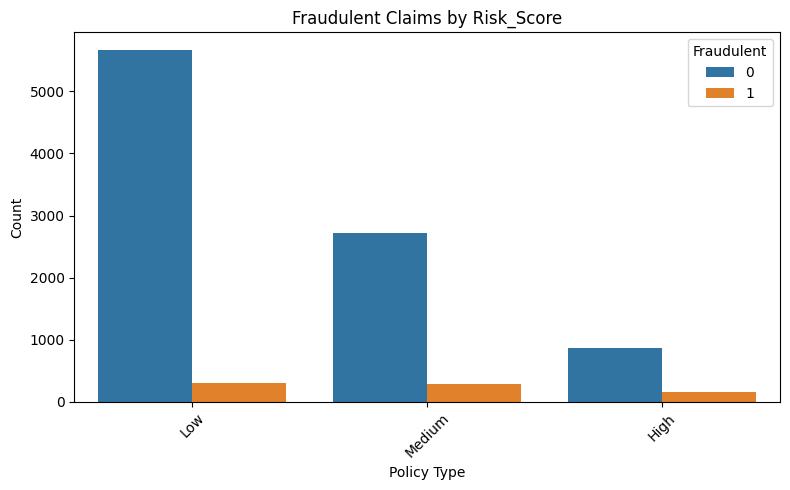

In [27]:

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Risk_Score', hue='Fraudulent_Claim')
plt.title("Fraudulent Claims by Risk_Score")
plt.xlabel("Policy Type")
plt.ylabel("Count")
plt.legend(title="Fraudulent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Correlation Maps</h3>

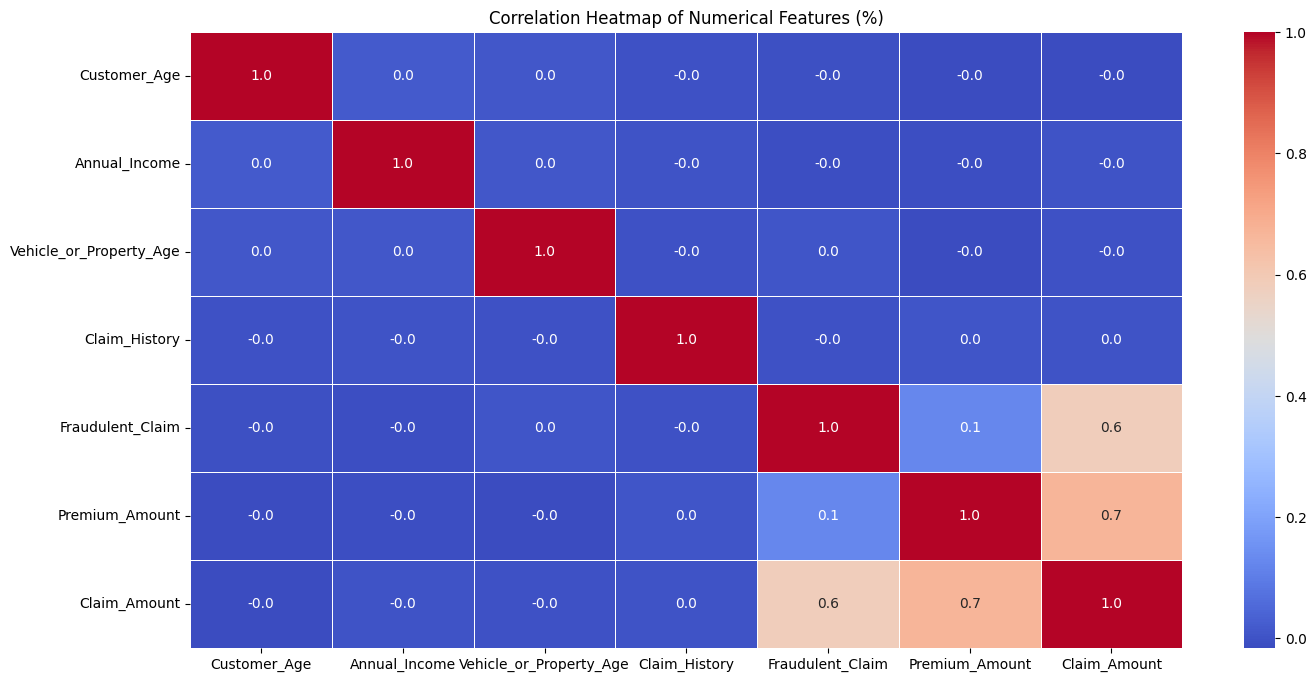

In [28]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features (%)")
plt.show()

<h4>Gender vs Fraudulent_Claim</h4>

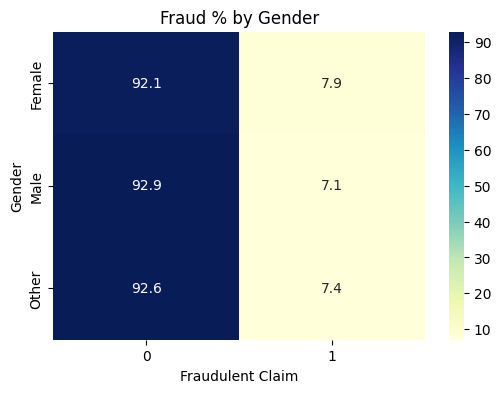

In [29]:

# Create crosstab
gender_fraud = pd.crosstab(df['Gender'], df['Fraudulent_Claim'], normalize='index') * 100

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(gender_fraud, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Fraud % by Gender')
plt.ylabel('Gender')
plt.xlabel('Fraudulent Claim')
plt.show()


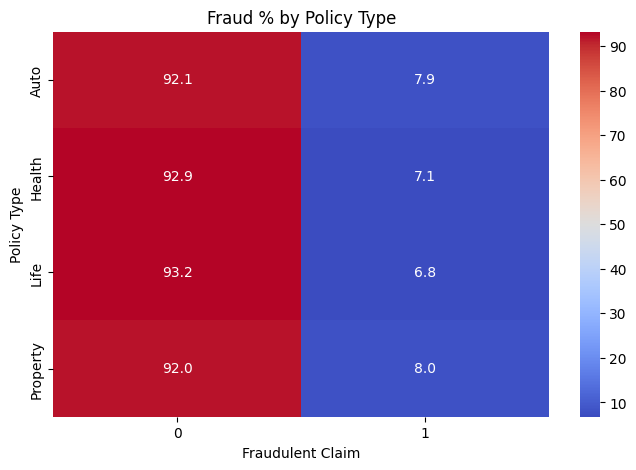

In [30]:
policy_fraud = pd.crosstab(df['Policy_Type'], df['Fraudulent_Claim'], normalize='index') * 100

plt.figure(figsize=(8,5))
sns.heatmap(policy_fraud, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Fraud % by Policy Type')
plt.ylabel('Policy Type')
plt.xlabel('Fraudulent Claim')
plt.show()

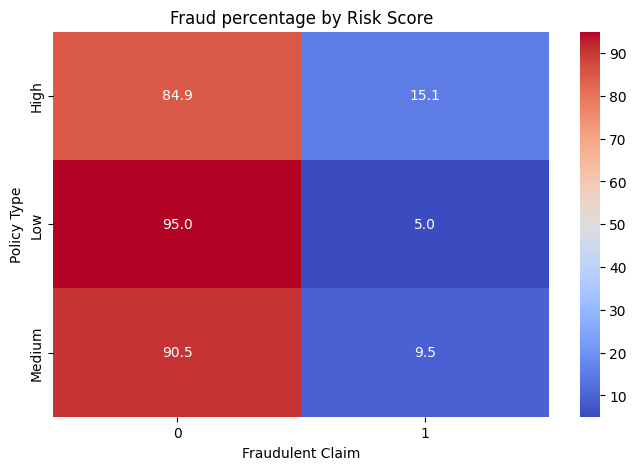

In [31]:
policy_fraud = pd.crosstab(df['Risk_Score'], df['Fraudulent_Claim'], normalize='index') * 100

plt.figure(figsize=(8,5))
sns.heatmap(policy_fraud, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Fraud percentage by Risk Score')
plt.ylabel('Policy Type')
plt.xlabel('Fraudulent Claim')
plt.show()

<h2>Multivariate Analysis</h2>

<h3> Pairplot colored by Fraudulent_Claim</h3>

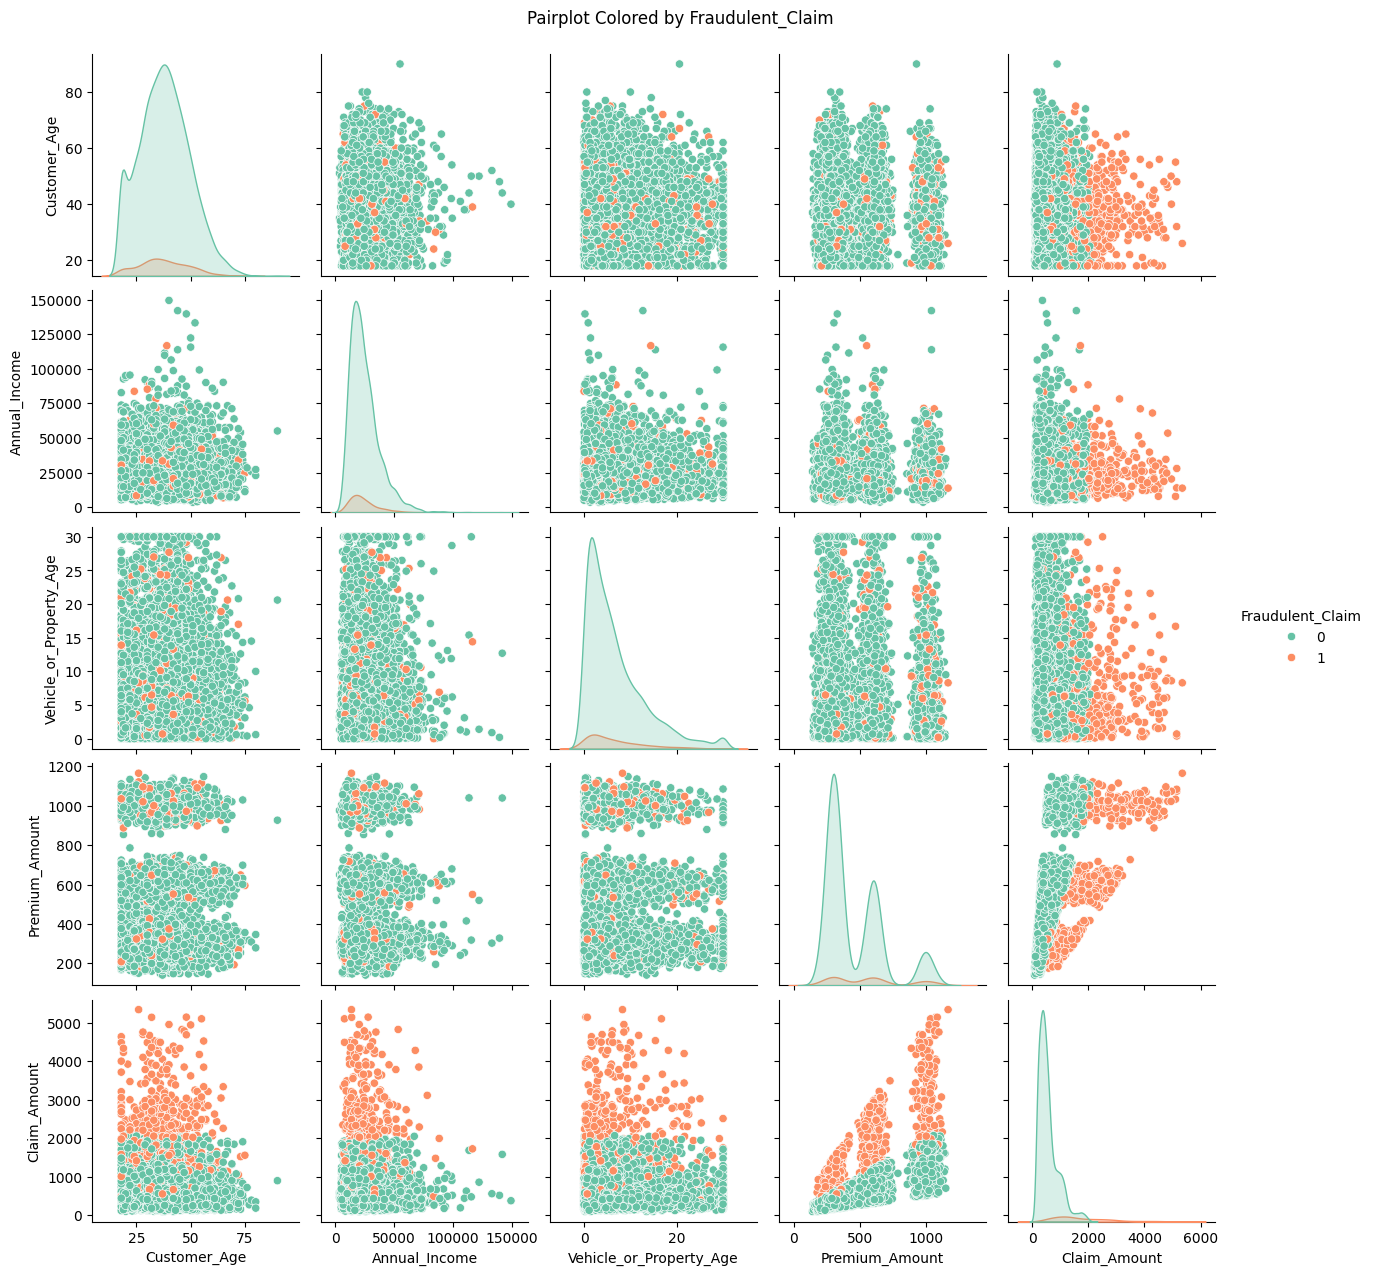

In [32]:
# Select numeric features
num_features = ['Customer_Age', 'Annual_Income', 'Vehicle_or_Property_Age', 'Premium_Amount', 'Claim_Amount']

# Plot
sns.pairplot(df[num_features + ['Fraudulent_Claim']], hue='Fraudulent_Claim', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot Colored by Fraudulent_Claim", y=1.02)
plt.show()

<h3>Pairplot colored by Risk_Score</h3>

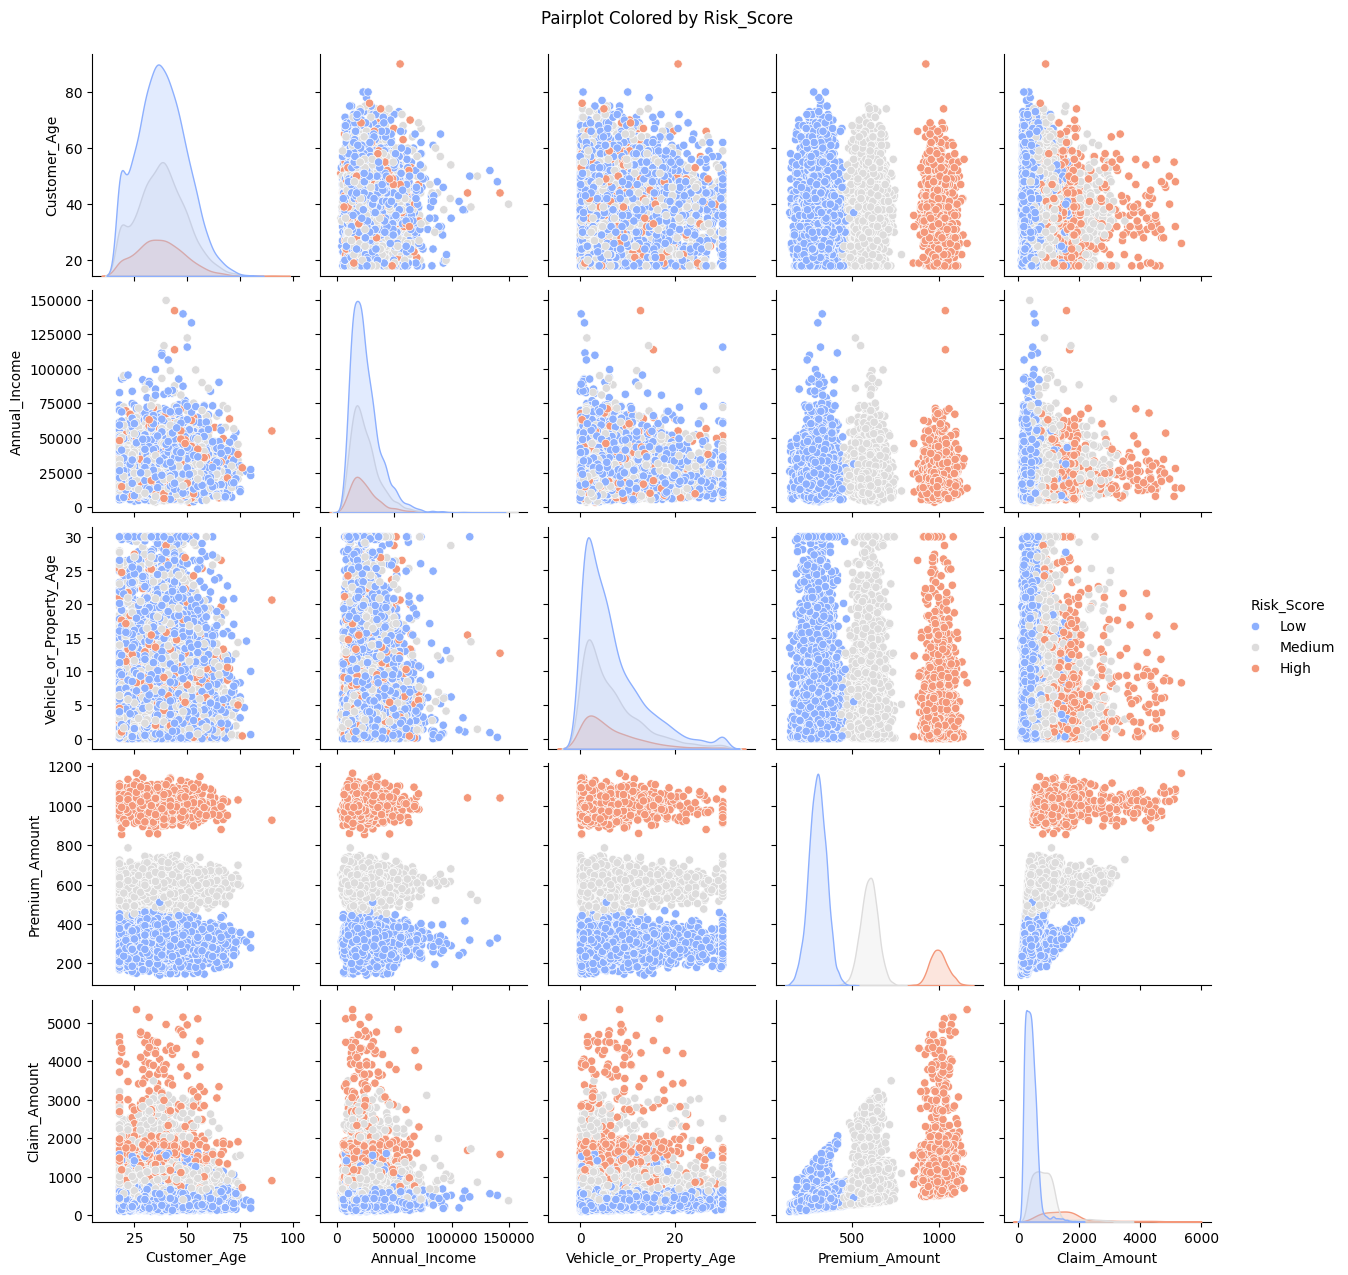

In [33]:
sns.pairplot(df[num_features + ['Risk_Score']], hue='Risk_Score', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot Colored by Risk_Score", y=1.02)
plt.show()

<h3>📌 Key Takeaways:</h3>

Premium Amount and Claim Amount have strong predictive signals for Risk Score.

Age and Vehicle/Property Age have slight but visible influence.

This pairplot validates that multivariate patterns can help identify risky profiles — useful for modeling fraud or risk score.

<h3>Check for Outliers</h3>

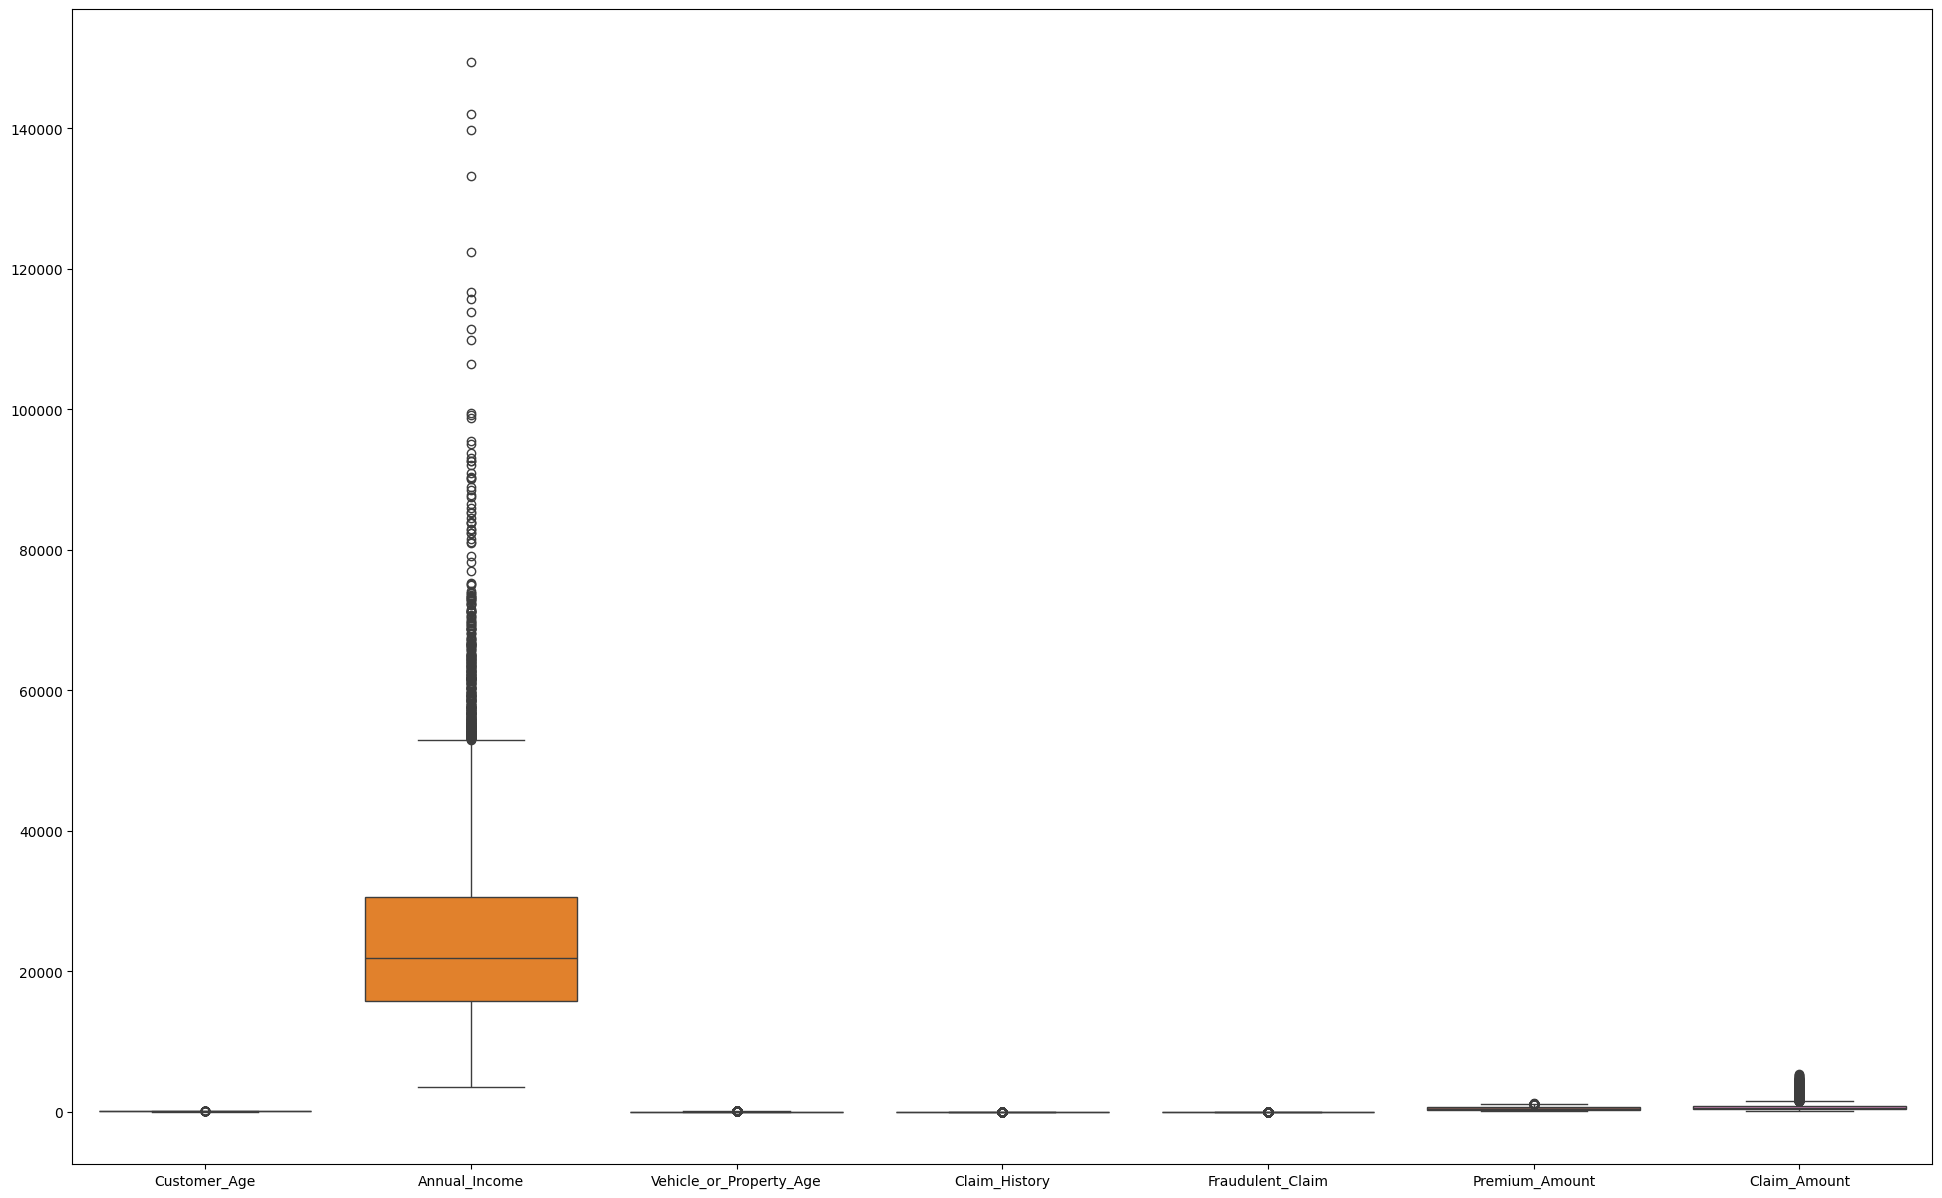

In [34]:
plt.figure(figsize=(24,15))
sns.boxplot(df)
plt.show()

**Checking for Missing Values**

In [35]:
df.isna().sum()

Policy_ID                    0
Customer_Age                 0
Gender                       0
Policy_Type                  0
Annual_Income              462
Vehicle_or_Property_Age    985
Claim_History                0
Fraudulent_Claim             0
Premium_Amount             528
Claim_Amount                 0
Risk_Score                   0
dtype: int64

<Axes: >

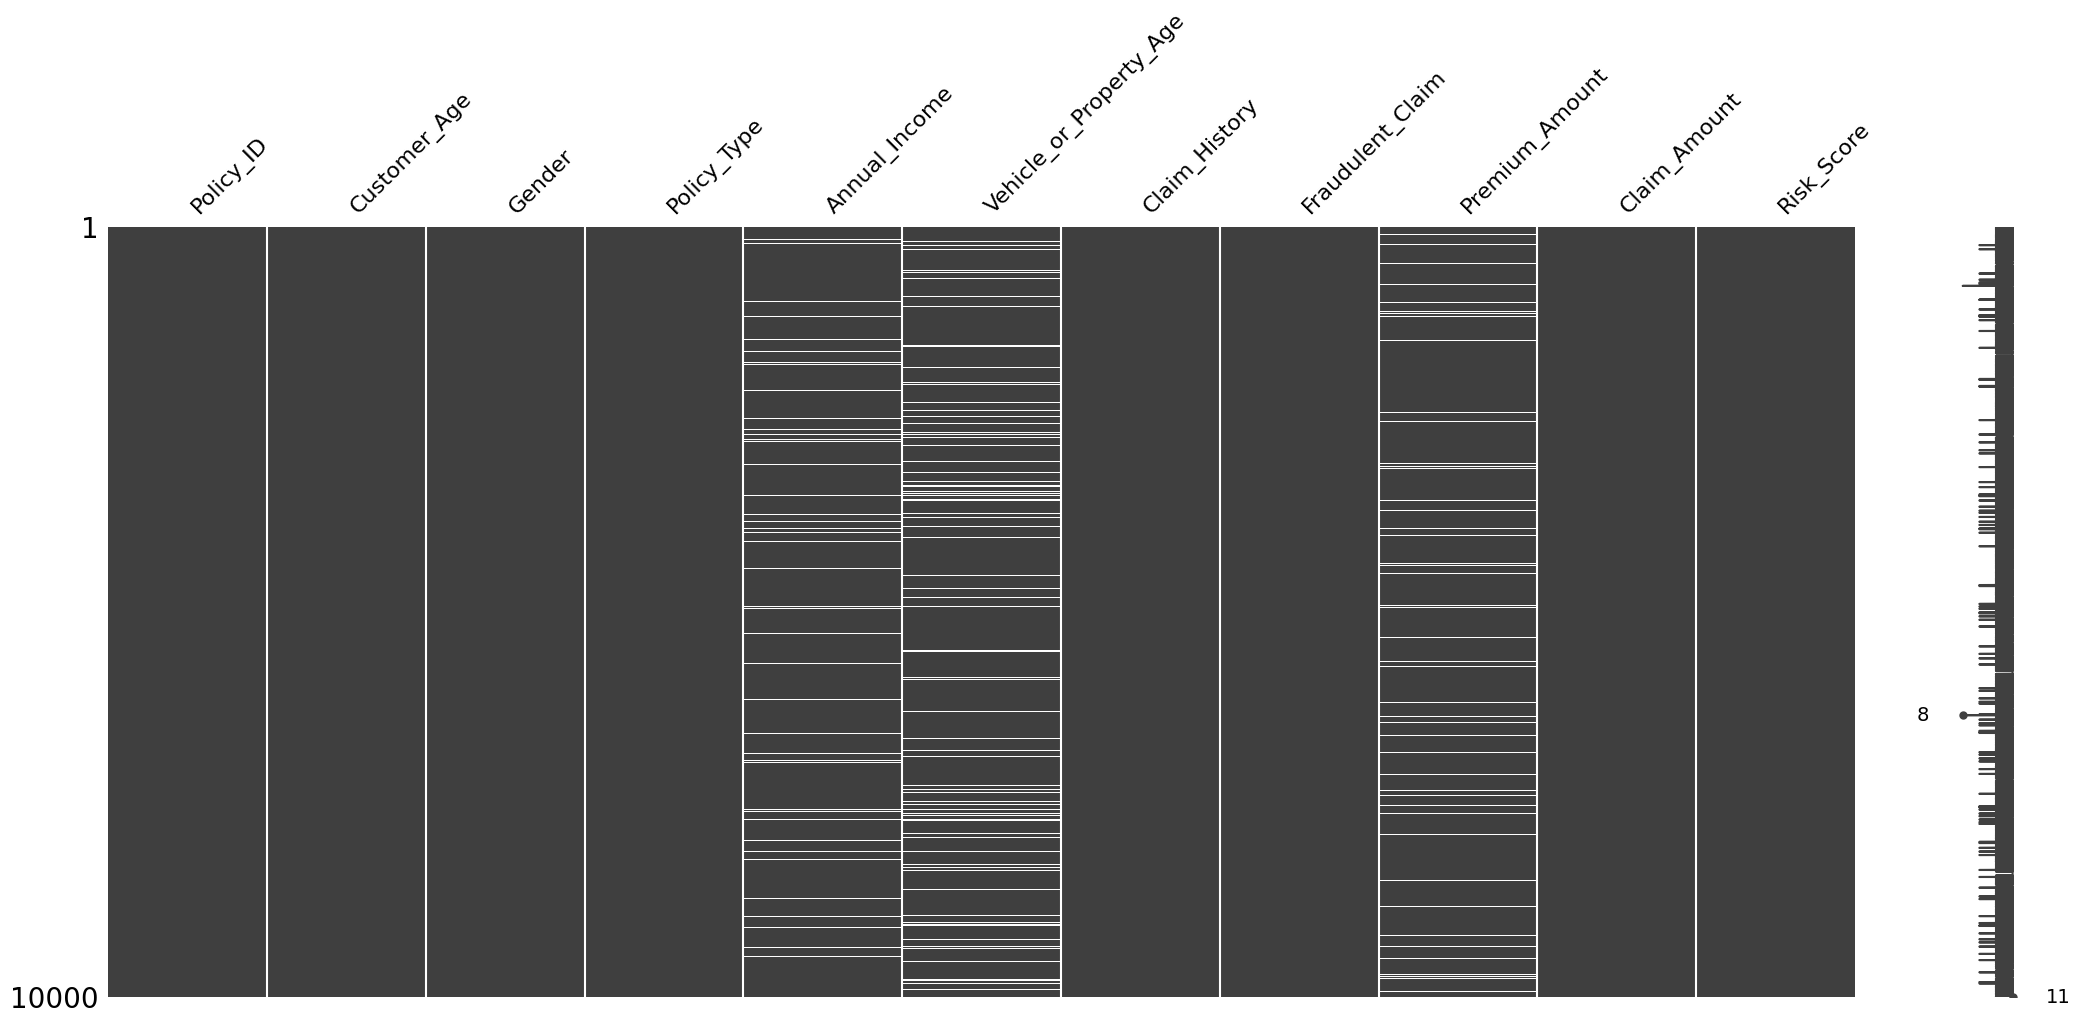

In [36]:
msno.matrix(df)

**Duplicates**

In [37]:
df.duplicated().sum()

0